# Outliers in Murder Accountability Project

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [3]:
map_data = pd.read_csv('data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


In [4]:
COLORS = {
    'Sex': ['pink', 'b', 'w'],
    'Solved': ['r', 'b'],
    'Source': ['g', 'b'],
}

## .75 Percentile

### By Year

In [123]:
by_year_75 = map_data.groupby('Year').count().quantile(q=.75)[0]
by_year_75

20863.0

In [124]:
by_year = map_data.groupby('Year').count()['CNTYFIPS'].to_frame()
all_cases_above_p75 = by_year[by_year['CNTYFIPS']>by_year_75].copy()
all_cases_above_p75.rename(columns={'CNTYFIPS': 'all_cases_above_p75'}, inplace=True)
all_cases_above_p75

,all_cases_above_p75
Year,
1979,21698
1980,23092
1981,21208
1990,21246
1991,22657
1992,23793
1993,24337
1994,23246
1995,21194


In [125]:
by_year['below_p75'] = by_year['CNTYFIPS']
by_year.loc[by_year['below_p75'] > by_year_75, 'below_p75'] = by_year_75

#### Solved by Year

In [23]:
solved_by_year_75 = map_data[map_data['Solved']=='Yes'].groupby('Year').count().quantile(q=.75)[0]
solved_by_year_75

14906.0

In [127]:
solved_by_year = map_data[map_data['Solved']=='Yes'].groupby('Year').count()['CNTYFIPS'].to_frame()
solved_cases_above_p75 = solved_by_year[solved_by_year['CNTYFIPS']>solved_by_year_75].copy()
solved_cases_above_p75.rename(columns={'CNTYFIPS': 'solved_cases_above_p75'}, inplace=True)
solved_cases_above_p75

,solved_cases_above_p75
Year,
1978,14992
1979,16029
1980,16729
1981,15788
1982,15060
1990,15001
1991,15321
1992,15881
1993,16436


In [128]:
solved_by_year['below_p75'] = solved_by_year['CNTYFIPS']
solved_by_year.loc[solved_by_year['below_p75'] > solved_by_year_75, 'below_p75'] = solved_by_year_75

#### Unsolved by Year

In [26]:
unsolved_by_year_75 = map_data[map_data['Solved']=='No'].groupby('Year').count().quantile(q=.75)[0]
unsolved_by_year_75

5938.5

In [129]:
unsolved_by_year = map_data[map_data['Solved']=='No'].groupby('Year').count()['CNTYFIPS'].to_frame()
unsolved_cases_above_p75 = unsolved_by_year[unsolved_by_year['CNTYFIPS']>unsolved_by_year_75].copy()
unsolved_cases_above_p75.rename(columns={'CNTYFIPS': 'unsolved_cases_above_p75'}, inplace=True)
unsolved_cases_above_p75

,unsolved_cases_above_p75
Year,
1980,6363
1990,6245
1991,7336
1992,7912
1993,7901
1994,7365
1995,6809
2016,6008
2017,5995


In [130]:
unsolved_by_year['below_p75'] = unsolved_by_year['CNTYFIPS']
unsolved_by_year.loc[unsolved_by_year['below_p75'] > unsolved_by_year_75, 'below_p75'] = unsolved_by_year_75

#### Visualizing

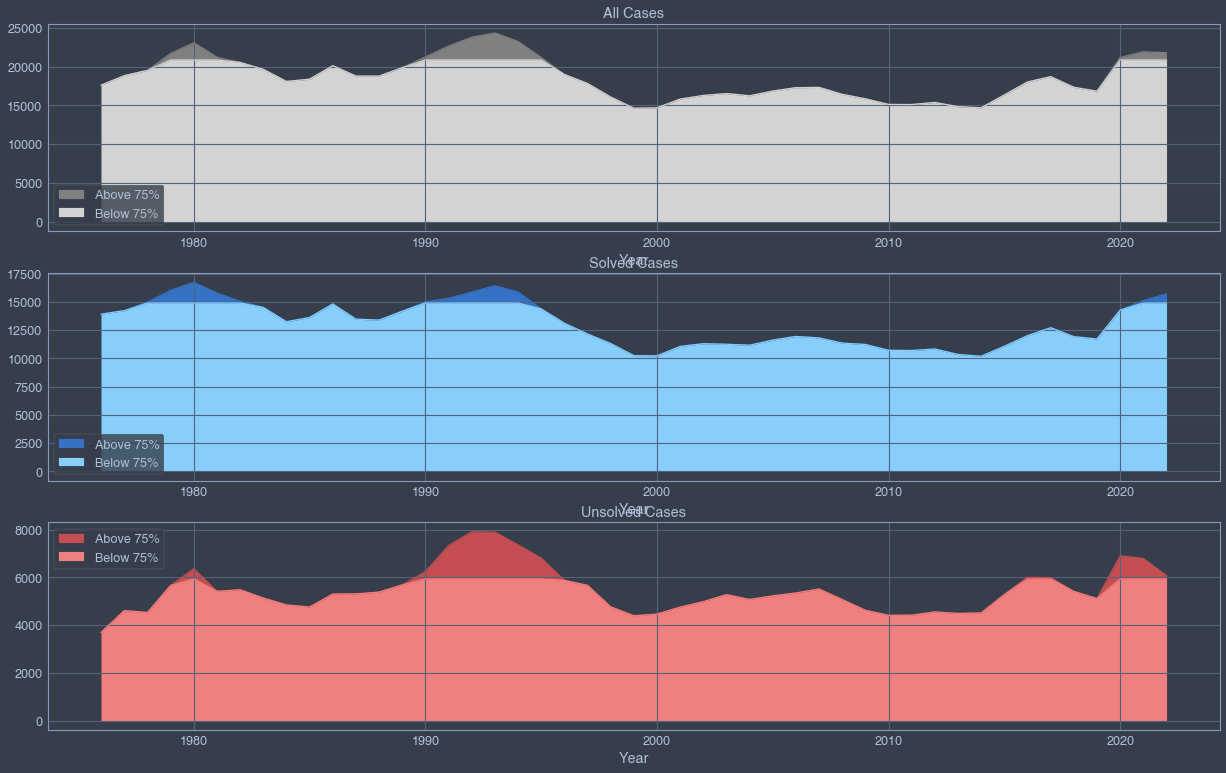

In [137]:
fig, ax = plt.subplots(3, 1, figsize=(21, 13))

by_year['CNTYFIPS'].plot(kind='area', ax=ax[0], color=['grey'], label='Above 75%')
by_year['below_p75'].plot(kind='area', ax=ax[0], color=['lightgrey'], label='Below 75%')
ax[0].set_title('All Cases')
ax[0].legend()

solved_by_year['CNTYFIPS'].plot(kind='area', ax=ax[1], color=['b'], label='Above 75%')
solved_by_year['below_p75'].plot(kind='area', ax=ax[1], color=['lightskyblue'], label='Below 75%')
ax[1].set_title('Solved Cases')
ax[1].legend()

unsolved_by_year['CNTYFIPS'].plot(kind='area', ax=ax[2], color=['r'], label='Above 75%')
unsolved_by_year['below_p75'].plot(kind='area', ax=ax[2], color=['lightcoral'], label='Below 75%')
ax[2].set_title('Unsolved Cases')
ax[2].legend()